In [9]:
# ! pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 660.6 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.5 MB 2.1 MB/s eta 0:00:01
     ------------------------------- -------- 1.2/1.5 MB 9.6 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/269.5 kB ? eta -:--:--
   --------------------------------------- 269.5/269.5 kB 16.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB ? eta 0:00:00
   -----------------------

In [1]:
# ! pip install pandas 

  Using cached pandas-2.2.0-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached tzdata-2023.4-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.0-cp39-cp39-win_amd64.whl (11.6 MB)
   ---------------------------------------- 0.0/505.5 kB ? eta -:--:--
   -- ------------------------------------ 30.7/505.5 kB 660.6 kB/s eta 0:00:01
   -------- ------------------------------- 112.6/505.5 kB 1.3 MB/s eta 0:00:01
   ------------------ --------------------- 235.5/505.5 kB 1.8 MB/s eta 0:00:01
   ---------------------------------- ----- 430.1/505.5 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 505.5/505.5 kB 2.9 MB/s eta 0:00:00
Using cached tzdata-2023.4-py2.py3-none-any.whl (346 kB)


In [2]:
# ! pip install numpy

In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 

C:\Users\HRUSHIKESH\AppData\Local\Temp\ipykernel_167272\2888317920.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r'E:\Git Demo\CDAC_Group_Project\toys.csv')

In [3]:
df

,Unnamed: 0,reviewText,class
0,0,the no. of stickers are less than what i expec...,0
1,1,We purchased these replacement parts anticipat...,0
2,2,"Grandchildren had fun playing . However, after...",0
3,3,I looked at a lot of these bath dolls and ende...,1
4,4,I did not find these toys in Korea. My kids lo...,1
...,...,...,...
299995,299995,There is a ton of bounce outs; at times it doe...,0
299996,299996,My Granddaughter wanted to get locked journals...,1
299997,299997,"We bought 2 of these, one for our 3yr old son ...",0
299998,299998,I do not have &#34;hands on&#34; experience wi...,0


In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HRUSHIKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HRUSHIKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
stopwords=stopwords.words('english')

In [8]:
from nltk.stem.wordnet import WordNetLemmatizer

In [9]:
ls = WordNetLemmatizer()

In [10]:
def clean_text(sent):
    token1 = word_tokenize(sent) #tokenizing the sentences
    #token2 = [x.lower() for x in token1 if x not in string.punctuation] #Removing the punctuations
    token2 = [x.lower() for x in token1 if x.isalpha() or x.isdigit()] #Removing the punctuations
    token3 = [ls.lemmatize(x) for x in token2 if x not in stopwords] #removing affixes
    return token3 

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HRUSHIKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# df['reviewText']=df['reviewText'].apply(lambda x:clean_text(x))

In [10]:
# df.drop('summary',axis=1,inplace=True)

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df.head()

,reviewText,class
0,the no. of stickers are less than what i expec...,0
1,We purchased these replacement parts anticipat...,0
2,"Grandchildren had fun playing . However, after...",0
3,I looked at a lot of these bath dolls and ende...,1
4,I did not find these toys in Korea. My kids lo...,1


In [13]:
y=df['class'][0:100000]

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [17]:
vectorizer = TfidfVectorizer(max_features=10000,analyzer=clean_text)  # You can adjust the number of features as needed
x = vectorizer.fit_transform(df['reviewText'][0:100000])
x

<100000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2710164 stored elements in Compressed Sparse Row format>

In [15]:
import seaborn as sns

<Axes: xlabel='count', ylabel='class'>

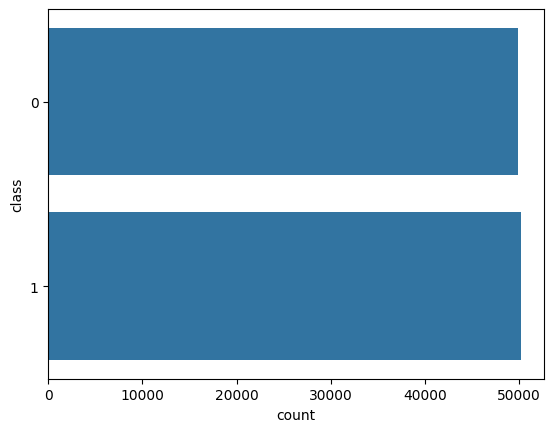

In [16]:
sns.countplot(y=y)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_sent,test_sent,train_labels,test_labels=train_test_split(x,y,stratify=y,test_size=0.3,random_state=0)

In [20]:
vectorizer.get_feature_names_out()

array(['0', '1', '10', ..., 'zooming', 'zords', 'zurg'], dtype=object)

In [21]:
from sklearn.svm import SVC

In [22]:
model = SVC(kernel='rbf')

In [23]:
model.fit(train_sent,train_labels)

SVC()

In [24]:
y_pred = model.predict(test_sent)

In [25]:
print(accuracy_score(test_labels,y_pred))

0.8468


In [26]:
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     14955
           1       0.85      0.85      0.85     15045

    accuracy                           0.85     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.85      0.85      0.85     30000



In [27]:
import joblib
joblib.dump(model,'SVM_Classifier_03(RBF_Kernel).joblib')

['SVM_Classifier_03(RBF_Kernel).joblib']